In [2]:
import cv2
import numpy as np

In [3]:
corner_track_params = dict(maxCorners=10, qualityLevel= 0.3, minDistance=7, blockSize=7)
corner_track_params

{'maxCorners': 10, 'qualityLevel': 0.3, 'minDistance': 7, 'blockSize': 7}

In [4]:
lk_params = dict(winSize=(200,200), maxLevel=2, criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))
lk_params

{'winSize': (200, 200), 'maxLevel': 2, 'criteria': (3, 10, 0.03)}

In [8]:
cap = cv2.VideoCapture(0)
ret,prev_frame = cap.read()
prev_gray = cv2.cvtColor(prev_frame, cv2.COLOR_BGR2GRAY)

# Points to Track
prev_pts = cv2.goodFeaturesToTrack(prev_gray, mask= None, **corner_track_params)
mask = np.zeros_like(prev_frame)
while True:
    ret, frame = cap.read()
    frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    next_pts, status, err = cv2.calcOpticalFlowPyrLK(prev_gray, frame_gray, prev_pts, None, **lk_params)
    good_new = next_pts[status==1]
    good_prev = prev_pts[status==1]
    for i, (new,prev) in enumerate(zip(good_new, good_prev)):
        x_new, y_new = new.ravel().astype(int)
        x_prev, y_prev = prev.ravel().astype(int)
        mask = cv2.line(mask, (x_new,y_new),(x_prev, y_prev),(0,255,0),3)
        frame = cv2.circle(frame, (x_new,y_new),8,(0,0,255),-1)
    img = cv2.add(frame, mask)
    cv2.imshow('tracking',img)
    k = cv2.waitKey(30) & 0xFF
    if k == 27:
        break
    prev_gray = frame_gray.copy()
    pre_pts = good_new.reshape(-1,1,2)
cv2.destroyAllWindows()
cap.release()

## Optical Flow

In [2]:
import cv2
import numpy as np

In [5]:
cap = cv2.VideoCapture(0)

ret,frame1 = cap.read()

prevImg = cv2.cvtColor(frame1,cv2.COLOR_BGR2GRAY) #Convert the captured image into gray scale


# Setting up the HSV mask

hsv_mask = np.zeros_like(frame1)
hsv_mask[:,:,1]= 255 #Selecting all the X and Y values along the saturation point and setting its value 255--> Fully saturated


while True:
    ret, frame2 = cap.read()
    #Compare the previous entire image to the current entire image
    nextImg = cv2.cvtColor(frame2, cv2.COLOR_BGR2GRAY)

    # Calculate the optical flow
    flow = cv2.calcOpticalFlowFarneback(prevImg,nextImg, None, 0.5,3,15,3,5,1.2,0)

    #Convert the flow from the cartesian coordintes to the polar coordinates
    mag, ang = cv2.cartToPolar(flow[:,:,0],flow[:,:,1], angleInDegrees=True)

    #Take the hsv mask hue and define it based on the angle
    hsv_mask[:,:,0] = ang/2 # Looking at half the hue

    hsv_mask[:,:,2] = cv2.normalize(mag,None,0,255, cv2.NORM_MINMAX)

    bgr = cv2.cvtColor(hsv_mask,cv2.COLOR_HSV2BGR)

    cv2.imshow('frame',bgr)

    k = cv2.waitKey(10) & 0xFF

    if k == 27:
         break
    prevImg = nextImg
cap.release()
cv2.destroyAllWindows()

## Flow Object 
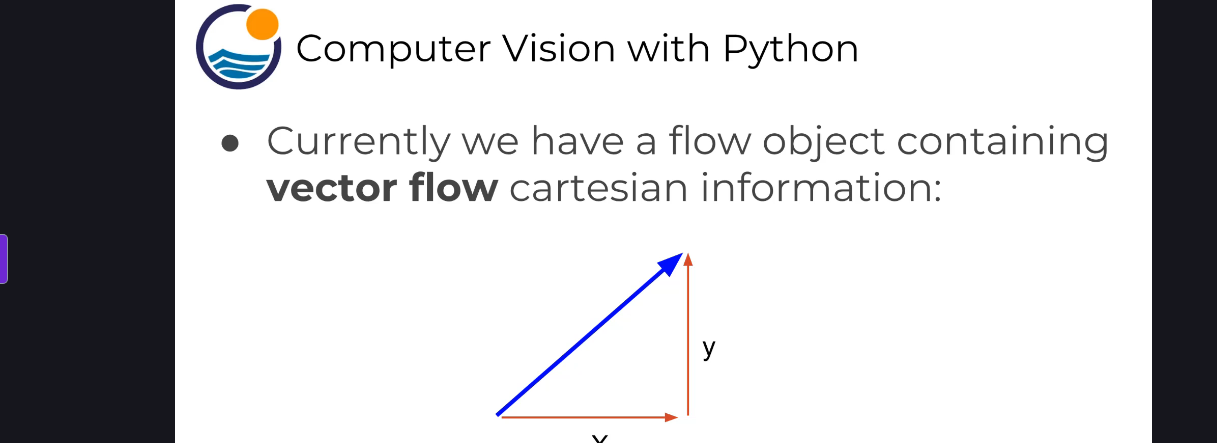


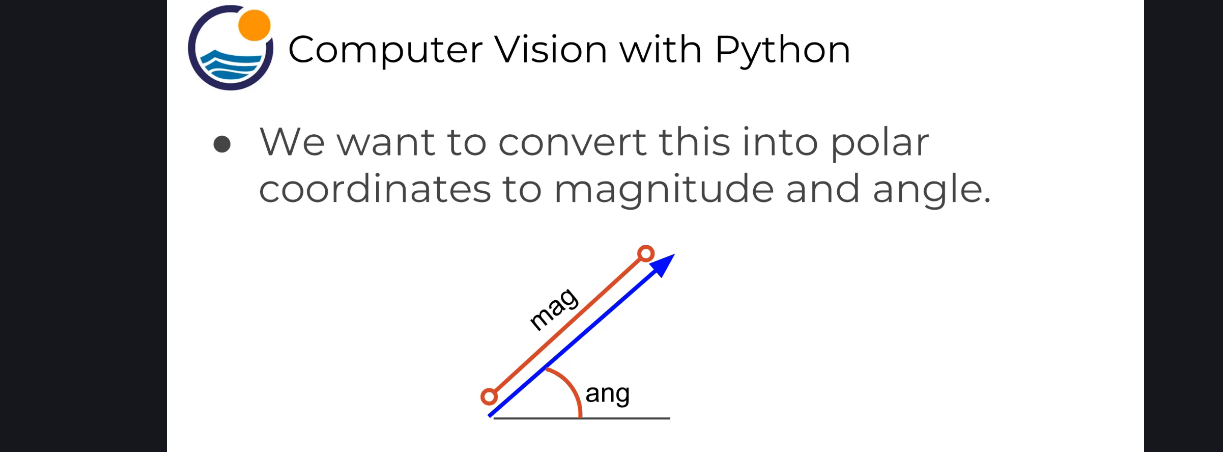


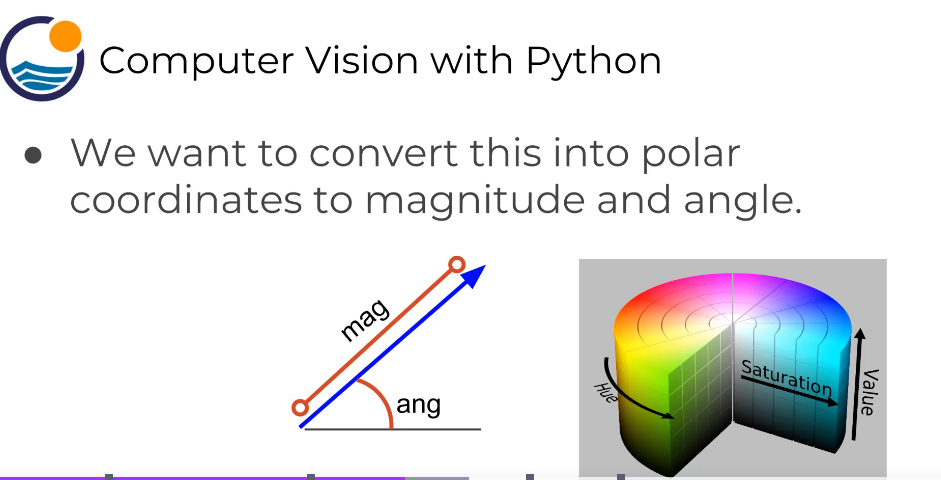

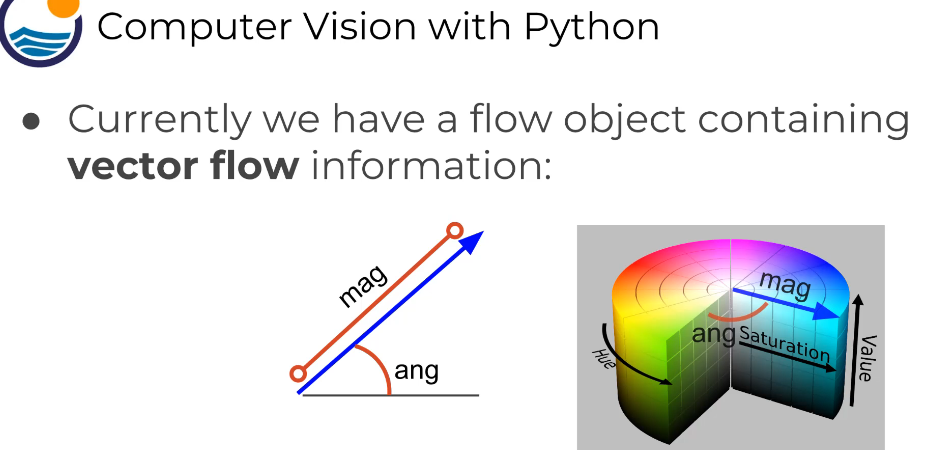